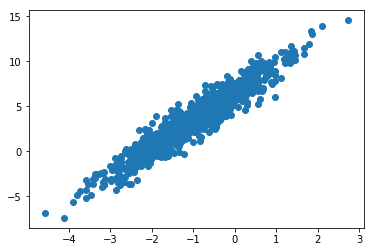

mean vector:
 [-0.9868456307880972, 3.523759355978942]
covariance matrix:
 [[ 1.0488663   3.14059323]
 [ 3.14059323 10.43188249]]
correlation coeff is:  0.9494460267240376
Variabes are positively correlated
eigenvalues are :  [ 0.09470579+0.j 11.386043  +0.j]
eigenvectors are :
 [[-0.95681567 -0.29069531]
 [ 0.29069531 -0.95681567]]
decomposition matrix :
 [[ 1.0488663 +0.j  3.14059323+0.j]
 [ 3.14059323+0.j 10.43188249+0.j]]
the principle components are :
 [[-0.95681567 -0.29069531]
 [ 0.29069531 -0.95681567]]
Eigenvalues in descending order:
11.386043000643326
0.09470578500510562
variaces for each component are :
 [(99.17509052089449+0j), (0.8249094791055185+0j)]
mean vector:
 [-0.9997863702618055, 3.5112031721142327, -0.08316660971060563, 3.0782340148458482, 1.0319622274923692]
covariance matrix:
 [[ 0.95237517  2.87950804 -0.06653584  0.01807121 -0.04845528]
 [ 2.87950804  9.70270498 -0.24349474  0.0872467  -0.12357462]
 [-0.06653584 -0.24349474  2.89509342  0.07193771 -0.02947856]

In [58]:
# homework # 01

## Here we are going to get a little experience with the covariance matrix 
## of data and principle components analysis (PCA).  This was introduced in the 
## lectures.

# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas
import pandas as pd
firstfile='homework_01_2d-datafile.csv'
data=pd.read_csv(firstfile)
    # make a scatter plot of them
import matplotlib.pyplot as plt
import numpy as np
data1=np.array(data[['X','Y']])
#print(data1)
assert data1.shape==(1000,2)
plt.scatter(data1[:,0],data1[:,1])
plt.show()
# 2) Find the covariance matrix for the two variables.  There is a python function 
#    for this, but it would be more instructive if you write your own.
import numpy as np
def my_cov(dataset):
        mean_vect=[]
        for i in range(dataset.shape[1]):
            m=np.mean(dataset[:,i])
            mean_vect.append(m)
        print('mean vector:\n',mean_vect)
        diff=dataset-mean_vect
        #print(diff)
        cov_matrix=(1/(dataset.shape[0]))*((diff.T).dot(diff))
        return cov_matrix
cov_matrix1= my_cov (data1)  
print ('covariance matrix:\n',cov_matrix1)
#cov=np.cov(data1[:,0],data1[:,1])
#print(cov)
    
    # Are they correlated? (Remember to normalize the correlation coefficient.)
std1=np.std(data1[:,0])
std2=np.std(data1[:,1])
ro1=cov_matrix1[0,1]/(std1*std2)
print('correlation coeff is: ',ro1)
if ro1>0 :
    print('Variabes are positively correlated')
elif ro1<0 :
    print('Variables are negatively correlated')
else :
    print('No Correlation')
# they are positively correlated
# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are 
#    python functions for this.)
import scipy.linalg as la
u, V = la.eig(cov_matrix1)
print('eigenvalues are : ',u)
print('eigenvectors are :\n', V)
print('decomposition matrix :\n',np.dot(V,np.dot(np.diag(u), la.inv(V))))
    # What are the principle components of the data? Normalize the vectors to one.
from sklearn import preprocessing
V_norm=preprocessing.normalize(V, norm='l2')
print('the principle components are :\n',V_norm)
eig_pairs = [(np.abs(u[i]), V[:,i]) for i in range(len(u))]
eig_pairs.sort()
eig_pairs.reverse()
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    # What are the variances of each principle component?
tot = sum(u)
var1 = [(i / tot)*100 for i in sorted(u, reverse=True)]
print('variaces for each component are :\n',var1)
#THE 2ND COMPONENT CAN BE DROPPED
# 4) Do 1 through 3, but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.
secondfile='homework_01_5d-datafile.csv'
seconddata=pd.read_csv(secondfile)
data2=np.array(seconddata[['X1','X2','X3','X4','X5']])
assert data2.shape==(2000,5)
cov_matrix2= my_cov (data2)  
print ('covariance matrix:\n',cov_matrix2)
#calculate the correlation coefficients matrix
def my_cor(dataset,covmatrix):
    std_vect=[]
    for i in range(dataset.shape[1]):
            std=np.std(dataset[:,i])
            std_vect.append(std)
    print(std_vect)
    cor_coef=[]
    for i in range(covmatrix.shape[1]):
        for j in range(covmatrix.shape[1]):
            ro=(covmatrix[i,j])/((std_vect[i])*(std_vect[j]))
            cor_coeff.apppend(ro)
    return cor_coeff
cor_coeff=(data2,cov_matrix2) #I don't know the error I made to get this matrix instead of having one with same dimensions as the covariance matrix
print('correlation coef matrix :\n',cor_coeff)
import scipy.linalg as la
u2, V2 = la.eig(cov_matrix2)
print('eigenvalues are : ',u2)
print('eigenvectors are :\n', V2)
print('decomposition matrix :\n',np.dot(V2,np.dot(np.diag(u2), la.inv(V2))))
from sklearn import preprocessing
V_norm2=preprocessing.normalize(V, norm='l2')
print('the principle components are :\n',V_norm2)
eig_pairs = [(np.abs(u2[i]), V2[:,i]) for i in range(len(u2))]
eig_pairs.sort()
eig_pairs.reverse()
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
tot = sum(u2)
var2 = [(i / tot)*100 for i in sorted(u2, reverse=True)]
print('variaces for each component are :\n',var2)
    # Which variables seem to be correlated with each other and which ones not?
    #Correlated variables are (X1,X2), (X2,X3), (X2,X4), (X4,X5)